In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
df  =  pd.read_csv(r'C:\Users\Muskan S\Downloads\LP-3\ML\Assignment 1\uber.csv')

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [8]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df.shape #To get the total (Rows,Columns)

(200000, 7)

In [10]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [12]:
df.describe() #To get statistics of each columns 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Filling Missing values

In [13]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
# passengger_count has null value so replace it with mean or median value
df['passenger_count'].fillna(value=df['passenger_count'].mean(),inplace = True)
df['pickup_longitude'].fillna(value=df['pickup_longitude'].mean(),inplace = True)
df['pickup_latitude'].fillna(value=df['pickup_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace = True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)




In [15]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## Checking outliers and filling them 

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

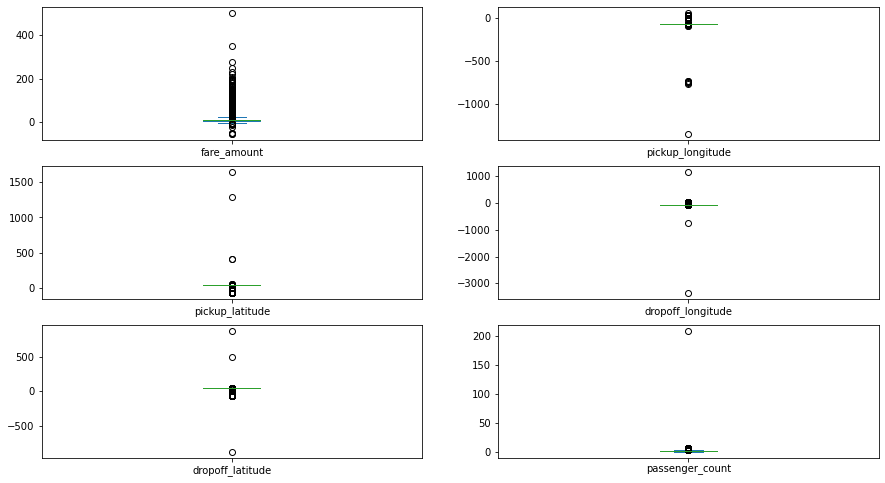

In [17]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [18]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
    
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1
 

    

In [20]:
 
df = treat_outliers_all(df , df.iloc[: , 0::])


TypeError: unsupported operand type(s) for -: 'str' and 'str'

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

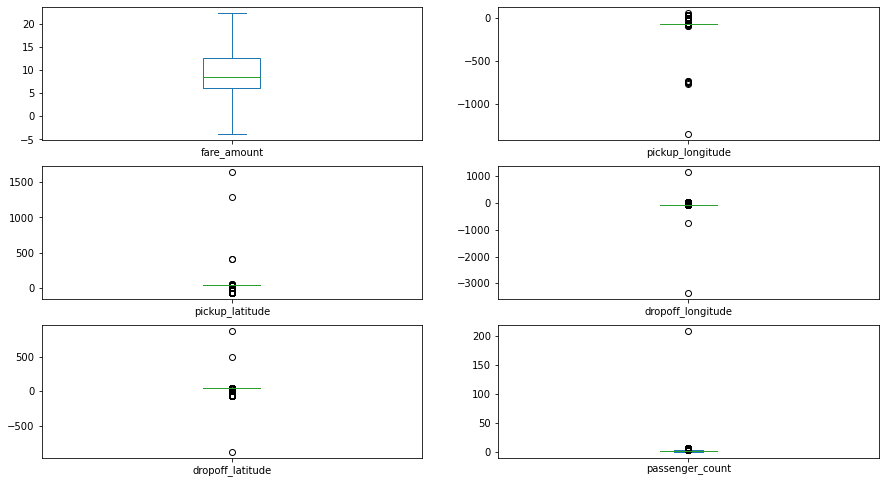

In [21]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [22]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [23]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

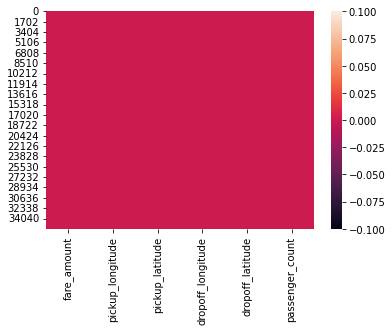

In [84]:
sns.heatmap(df.isnull()) #Free for null values

In [24]:
corr = df.corr() #Function to find the correlation

In [25]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.003760,-0.002028,0.001692,-0.003668,0.013624
pickup_longitude,0.003760,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.002028,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.001692,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.003668,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.013624,-0.000414,-0.001560,0.000033,-0.000659,1.000000


<AxesSubplot:>

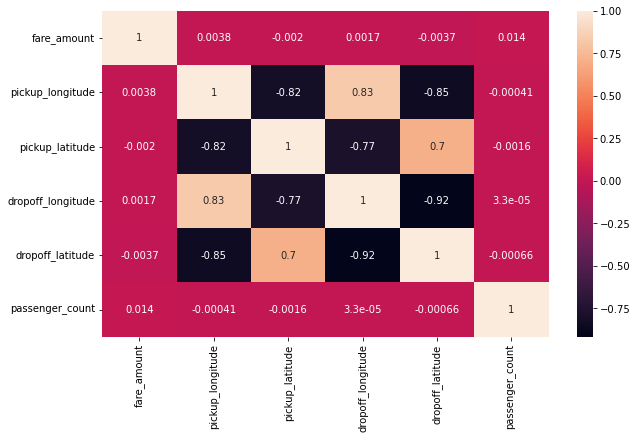

In [26]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [27]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [28]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [ ]:
#y = df['fare_amount']

### Dividing the dataset into training and testing dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [30]:
X_train

array([[11.5, '2015-05-28 19:16:17 UTC', -74.0062942504883,
        40.75129318237305, -73.99100494384766, 40.73623275756836],
       [4.9, '2011-06-25 15:57:09 UTC', -73.979261, 40.759551,
        -73.98899300000001, 40.758057],
       [6.5, '2013-08-28 19:55:00 UTC', -74.00657199999999, 40.744382,
        -73.993347, 40.752552],
       ...,
       [14.9, '2011-08-24 00:51:00 UTC', -73.963937, 40.807537,
        -73.991338, 40.751225],
       [8.1, '2009-12-12 11:34:58 UTC', -73.954642, 40.784045,
        -73.964597, 40.757144],
       [7.3, '2010-02-09 19:21:46 UTC', -73.965752, 40.795406,
        -73.98305699999999, 40.770114]], dtype=object)

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [32]:
regression.fit(X_train,y_train)

ValueError: could not convert string to float: '2015-05-28 19:16:17 UTC'

In [33]:
regression.intercept_ #To find the linear intercept

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [34]:
regression.coef_ #To find the linear coeeficient

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [35]:
prediction = regression.predict(X_test) #To predict the target values

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [36]:
print(prediction)

NameError: name 'prediction' is not defined

In [37]:
y_test

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [38]:
from sklearn.metrics import r2_score 

In [114]:
r2_score(y_test,prediction)

0.0003531071428344301

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
MSE = mean_squared_error(y_test,prediction)

In [117]:
MSE 

0.7587261028954677

In [118]:
RMSE = np.sqrt(MSE)

In [119]:
RMSE

0.8710488521865279

### Random Forest Regression

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [122]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [123]:
y_pred = rf.predict(X_test)

In [124]:
y_pred

array([1.46      , 1.615     , 1.38      , ..., 1.64290476, 1.455     ,
       1.615     ])

### Metrics evaluatin for Random Forest

In [125]:
R2_Random = r2_score(y_test,y_pred)

In [126]:
R2_Random

-0.06550647590096692

In [127]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [128]:
MSE_Random

0.8087131384559171

In [129]:
RMSE_Random = np.sqrt(MSE_Random)

In [130]:
RMSE_Random

0.8992847927413857